Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#plotting related libraries
import seaborn as sns
!pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.9 MB/s eta 0:00:00


Importing the dataset

In [ ]:
dataset = pd.read_csv('ML_dataset.csv')
dataset = dataset.dropna(axis=1, how='all')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)

[['CsPbI3' 0.1 1000000000000.0 10000000000.0]
 ['CsPbI3' 0.1 1000000000000.0 100000000000.0]
 ['CsPbI3' 0.1 1000000000000.0 1000000000000.0]
 ...
 ['CsSnI3' 1.0 1e+16 10000000000000.0]
 ['CsSnI3' 1.0 1e+16 100000000000000.0]
 ['CsSnI3' 1.0 1e+16 1000000000000000.0]]


Handling missing data

In [ ]:
# For sensitive dataset, just delete the entire row that contains missing values.
# But here we are using mean values as placeholders.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:4])
X[:, 1:4] = imputer.transform(X[:, 1:4])

Encoding categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the first column (column 0) of X
X[:, 0] = label_encoder.fit_transform(X[:, 0])

# Save the mapping of categories to integers
absorber_names = {index: label for index, label in enumerate(label_encoder.classes_)}

# Print the mapping (for reference)
print("Label Mapping:", absorber_names)

Label Mapping: {0: 'CsPbBr3', 1: 'CsPbI3', 2: 'CsSnCl3', 3: 'CsSnI3'}


In [ ]:
print(X)

[[1 0.1 1000000000000.0 10000000000.0]
 [1 0.1 1000000000000.0 100000000000.0]
 [1 0.1 1000000000000.0 1000000000000.0]
 ...
 [3 1.0 1e+16 10000000000000.0]
 [3 1.0 1e+16 100000000000000.0]
 [3 1.0 1e+16 1000000000000000.0]]


Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Applying the regression model

In [ ]:
# for XGBoost regression model:
import xgboost as xgb
regressor = xgb.XGBRegressor(enable_categorical=True)
regressor.fit(X_train, y_train)
# for Random Forest regression model:
# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
# regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

Predicting the test set results

In [ ]:
y_pred = regressor.predict(X_test)
# Optional codes, just to check the prediction vs actual values.
np.set_printoptions(precision=2)
for pred, true_value in zip(y_pred, y_test):
    print(f"{pred:.2f} {true_value:.2f}")

11.15 11.15
2.48 2.48
8.64 8.64
10.82 10.74
6.25 6.25
5.19 5.18
13.05 13.04
0.01 0.01
0.01 0.01
0.02 0.02
2.59 2.59
0.02 0.02
2.59 2.59
4.47 4.46
4.07 4.07
4.34 4.25
0.02 0.02
9.30 9.31
8.26 8.26
0.02 0.02
0.02 0.02
0.01 0.01
0.01 0.01
0.01 0.01
0.01 0.01
8.71 8.71
9.89 9.91
11.15 11.12
11.91 11.91
0.02 0.02
5.90 5.90
5.81 5.81
13.92 13.92
6.25 6.25
5.33 5.32
0.01 0.01
12.71 12.71
0.02 0.02
14.54 14.55
4.75 4.75
0.01 0.01
13.10 13.11
5.07 5.05
12.27 12.27
11.07 11.07
4.61 4.60
2.59 2.59
0.01 0.01
0.02 0.02
9.71 9.68
12.63 12.64
0.01 0.01
0.01 0.01
14.47 14.47
0.02 0.02
0.02 0.02
5.90 5.90
9.35 9.35
4.65 4.66
0.01 0.01
5.89 5.89
4.74 4.73
3.47 3.47
9.50 9.50
0.01 0.01
5.12 5.13
4.64 4.63
11.44 11.44
14.29 14.29
0.01 0.01
3.81 3.81
13.96 13.96
13.21 13.21
4.85 4.84
13.82 13.82
0.02 0.02
14.54 14.55
14.76 14.75
3.11 3.11
5.16 5.17
0.02 0.02
0.01 0.01
3.89 3.90
13.45 13.45
11.25 11.24
0.01 0.01
10.29 10.28
11.44 11.44
8.86 8.80
0.02 0.02
13.39 13.39
4.74 4.74
0.02 0.02
3.46 3.45
11.44 11.4

Evaluating the model performance

In [ ]:
# R^2 score, The more it is closer to 1, the better the model.
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9999831327916622

Scattered plot

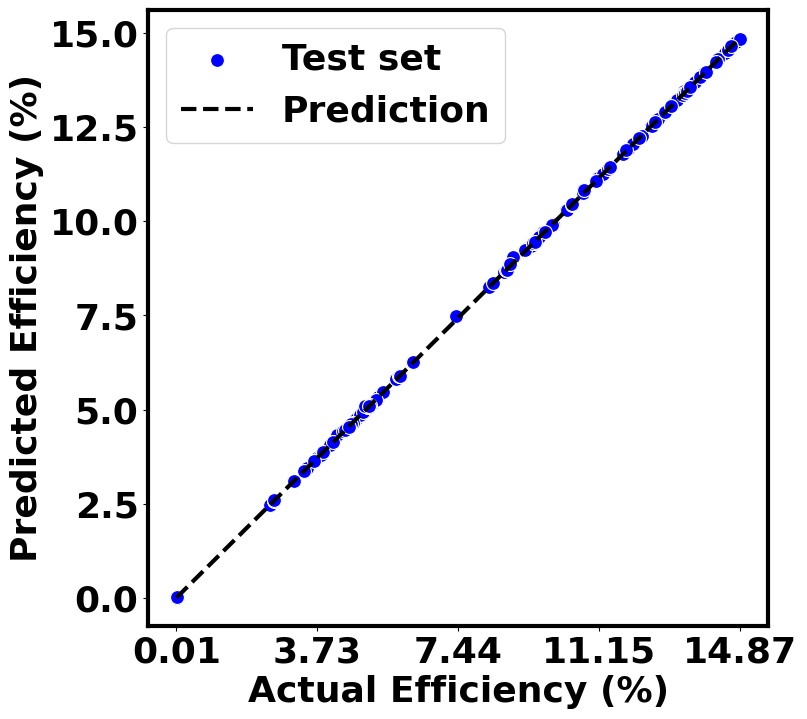

In [ ]:
# Create a new figure with font properties set globally
plt.rcParams['font.size'] = 26
plt.rcParams['font.weight'] = 'bold'

plt.figure(figsize=(8, 8))

# Plot test set (blue dots)
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Test set', s=100)

# Plot a dashed diagonal line representing the perfect prediction
min_val = min(y_test)
max_val = max(y_test)
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--', linewidth=3, label='Prediction')

# Set plot title and labels
plt.xlabel('Actual Efficiency (%)', fontweight='bold', fontsize=26)
plt.ylabel('Predicted Efficiency (%)', fontweight='bold', fontsize=26)
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)

# Increase the number of x-axis labels
x_ticks = np.linspace(start=min_val, stop=max_val, num=5)
plt.xticks(x_ticks)

# Show the legend
plt.legend()

# Display the plot
plt.show()

SHAP curve

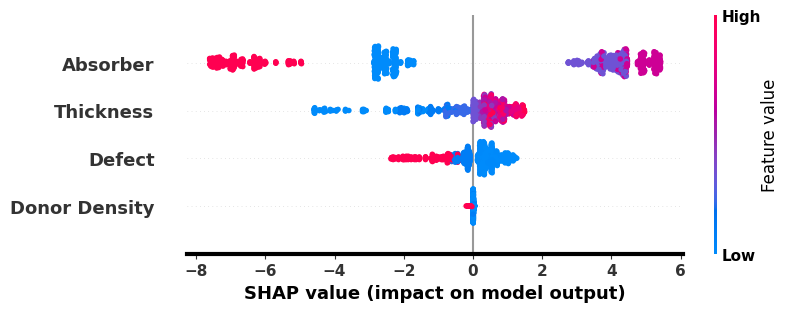

In [ ]:
# Initialize the SHAP explainer with the model and the data
explainer = shap.Explainer(regressor, feature_names=['Absorber','Thickness', 'Defect', 'Donor Density'])

# Calculate SHAP values
shap_values = explainer(X_train)

plt.xlabel("SHAP value (impact on model output)", fontweight='bold', fontsize=26)

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)

shap.plots.beeswarm(shap_values)

plt.show()